In [4]:
import pandas as pd
df = pd.read_excel('proteome.xlsx',sep="\t",header=1)

In [7]:
a = df.columns
print(a)

Index(['Spot \nNumber', 'pH Range',
       'PlasmoDB ID \nor NCBI \nAccession \nNumber', 'Protein Name',
       'Protein Name \nAbbreviation', 'Organism',
       'PMF: Masses=\nPeptides\nSearched', 'PMF: Masses=Peptides \nMatched',
       'PMF: Sequence Coverage', 'PMF: Mascot \nScore',
       'MSMS: Fragment \nIons Matched (of 10)', ' MSMS: Sequence Coverage',
       'MSMS: Mascot \nScore', 'Expected \nMW [kDa]',
       'Apparent MW \nof Spot [kDa]', 'Designation of MW', 'Expected\npI',
       'Apparent \npI of Spot',
       'Absolute Abundance Percentile Bin: Rings \n(Bin 10 = most abundant)',
       'Absolute Abundance Percentile Bin: Trophozoites\n(Bin 10 = most abundant)',
       'Absolute Abundance Percentile Bin: Schizonts\n (Bin 10 = most abundant)',
       'Unnamed: 21',
       'Fourier Phase of Relative Abundance Profile  \n[hpi equivalent]',
       'Time of Major Peak of Polynomial Fit \n[hpi]', 'Unnamed: 24', '2hpi',
       '4hpi', '6hpi', '8hpi', '10hpi', '12hpi', '14hpi',

In [9]:
line_plas1 = 0
for i in range(df.shape[0]):
    if df.at[i,'PlasmoDB ID \nor NCBI \nAccession \nNumber'] == 'PF14_0076':
        line_plas1 = i
print(line_plas1)

281


In [10]:
print(df.at[281,'Protein Name'])

Plasmepsin I


In [14]:
plas1_values = []
for i in range(2,50,2):
    plas1_values.append(df.at[line_plas1,(str)(i)+'hpi'])

In [15]:
print(plas1_values)

[-0.196, -0.0044, 0.1443, 0.1423, 0.4218, 0.4842, 0.4658, 0.9082, 0.5931, 0.5166, 0.3629, 0.633, 0.1897, 0.203, 0.2106, -0.4675, -0.552, -0.619, -0.4055, -0.6111, -0.6373, -0.5524, -0.5296, -0.7005]


In [20]:
plas1_converted_values = []
plas1_values_nonlog = []
for value in plas1_values:
    plas1_values_nonlog.append(2**value)

max_value = 0
for value in plas1_values_nonlog:
    if max_value <= value:
        max_value = value
for value in plas1_values_nonlog:
    plas1_converted_values.append(value/max_value)
print(plas1_converted_values)  

[0.46516033946598556, 0.5312268601913612, 0.5889022129736791, 0.5880863867748676, 0.7138040538970792, 0.7453551933994603, 0.7359093653951765, 1.0, 0.8037952739693877, 0.762283735802174, 0.6852488941717864, 0.8263357557536755, 0.6077289822738753, 0.6133574533349501, 0.6165970960498863, 0.38536568038848057, 0.36344274197519405, 0.34695007892607915, 0.4022878301765208, 0.3488551411003929, 0.3425769525441423, 0.3633419882185179, 0.36912977012576664, 0.3278936800391681]


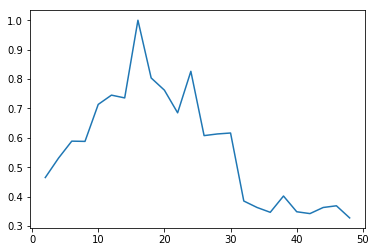

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
plas1_plot = fig.add_subplot(111)
plas1_plot.plot(range(2,50,2),plas1_converted_values)
plt.show()